In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
url='https://drive.google.com/file/d/1CLUEhbQXlIDvqbbRCpr7jVOWpJ28XgI4/view?usp=sharing'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id

df = pd.read_csv(dwn_url, sep=',', header=0)
print(df.columns)


Index(['Company', 'Product', 'TypeName', 'Inches', 'Ram', 'OS', 'Weight',
       'Price_euros', 'Screen', 'ScreenW', 'ScreenH', 'Touchscreen',
       'IPSpanel', 'RetinaDisplay', 'CPU_company', 'CPU_freq', 'CPU_model',
       'PrimaryStorage', 'SecondaryStorage', 'PrimaryStorageType',
       'SecondaryStorageType', 'GPU_company', 'GPU_model'],
      dtype='object')


In [ ]:
df.head(3)

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

In [ ]:
df.describe()

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,8.440784,2.040525,1134.969059,1900.043922,1073.904314,2.302980,444.517647,176.069020
std,1.429470,5.097809,0.669196,700.752504,493.346186,283.883940,0.503846,365.537726,415.960655
min,10.100000,2.000000,0.690000,174.000000,1366.000000,768.000000,0.900000,8.000000,0.000000
25%,14.000000,4.000000,1.500000,609.000000,1920.000000,1080.000000,2.000000,256.000000,0.000000
50%,15.600000,8.000000,2.040000,989.000000,1920.000000,1080.000000,2.500000,256.000000,0.000000
75%,15.600000,8.000000,2.310000,1496.500000,1920.000000,1080.000000,2.700000,512.000000,0.000000
max,18.400000,64.000000,4.700000,6099.000000,3840.000000,2160.000000,3.600000,2048.000000,2048.000000


In [ ]:
# Calculando los datos faltantes
numero_filas = len(df)
numero_filas
na_por_fila = df.isnull().sum()
na_por_fila = pd.DataFrame(na_por_fila, columns=['numero_na'])
na_por_fila['porcentaje_na'] = (na_por_fila['numero_na']/numero_filas)*100
na_por_fila

,numero_na,porcentaje_na
Company,0,0.0
Product,0,0.0
TypeName,0,0.0
Inches,0,0.0
Ram,0,0.0
OS,0,0.0
Weight,0,0.0
Price_euros,0,0.0
Screen,0,0.0
ScreenW,0,0.0


In [ ]:
df = df.replace(-99, np.nan)

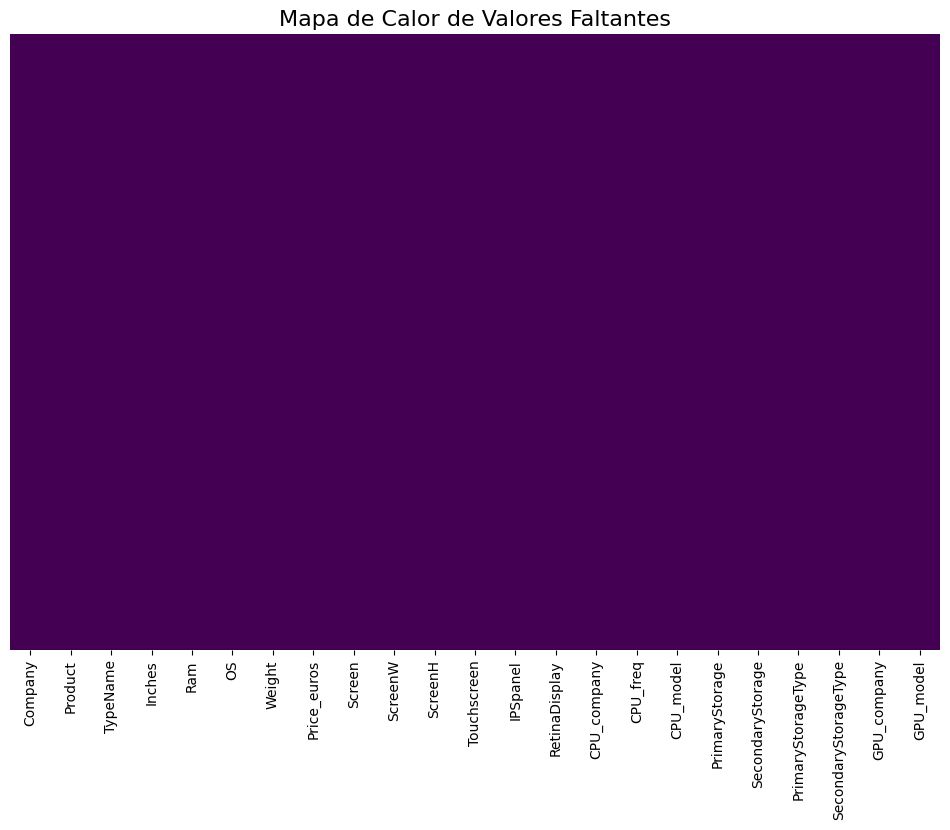

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)

plt.title("Mapa de Calor de Valores Faltantes", fontsize=16)
plt.show()

### Metodo detección Intercuartílico (IQR)

In [ ]:
columnas = 'Price_euros'
Q1 = df[columnas].quantile(0.25)
Q3 = df[columnas].quantile(0.75)
IQR = Q3 - Q1
print(f"IQR = {IQR:.2f}")

IQR = 887.50


In [ ]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lim. Inf. = {lower_bound:.2f}")
print(f"Lim. Sup. = {upper_bound:.2f}")

Lim. Inf. = -722.25
Lim. Sup. = 2827.75


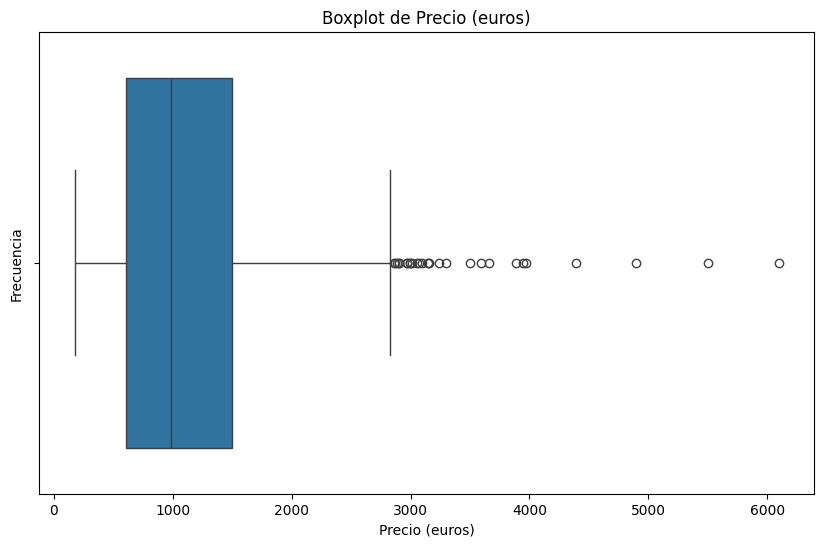

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Price_euros'])
plt.title('Boxplot de Precio (euros)')
plt.xlabel('Precio (euros)')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
df.head(3)

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620


In [ ]:
df['Price_euros'] = df['Price_euros'].apply(lambda x: np.log(x) if x > 0 else x)

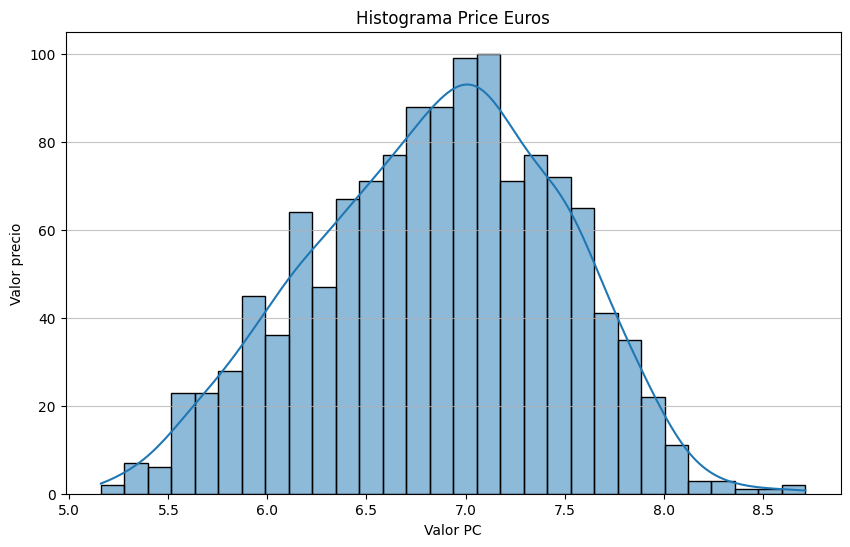

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price_euros'], bins=30, kde=True)
plt.title('Histograma Price Euros')
plt.xlabel('Valor PC')
plt.ylabel('Valor precio')
plt.grid(axis='y', alpha=0.75)
plt.show()

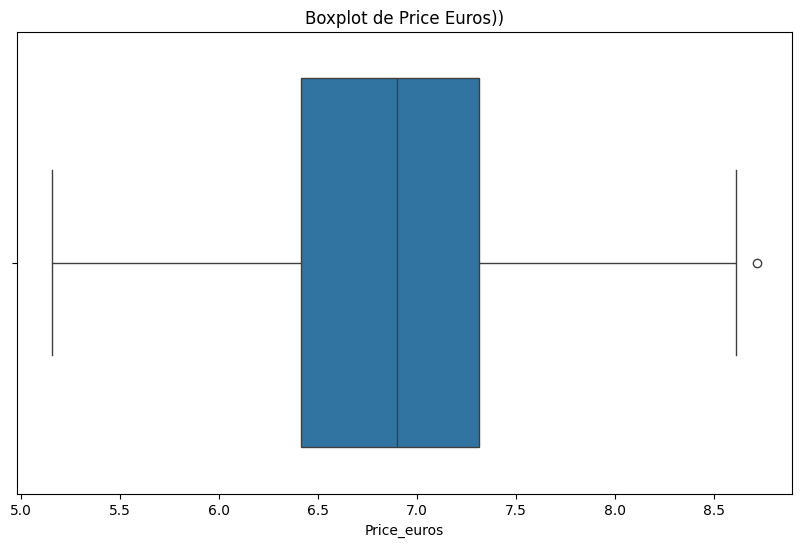

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Price_euros'])
plt.title('Boxplot de Price Euros))')
plt.show()

### Matriz de Corrrelación

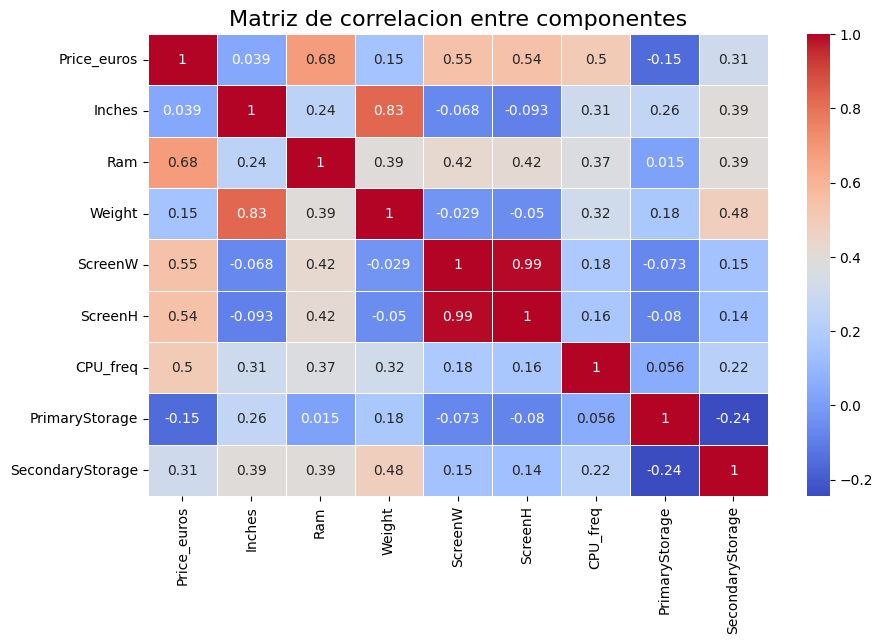

In [ ]:
correlacion = df[['Price_euros', 'Inches', 'Ram', 'Weight', 'ScreenW', 'ScreenH', 'CPU_freq', 'PrimaryStorage', 'SecondaryStorage']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlacion, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title(
    "Matriz de correlacion entre componentes", fontsize=16
)
plt.show()

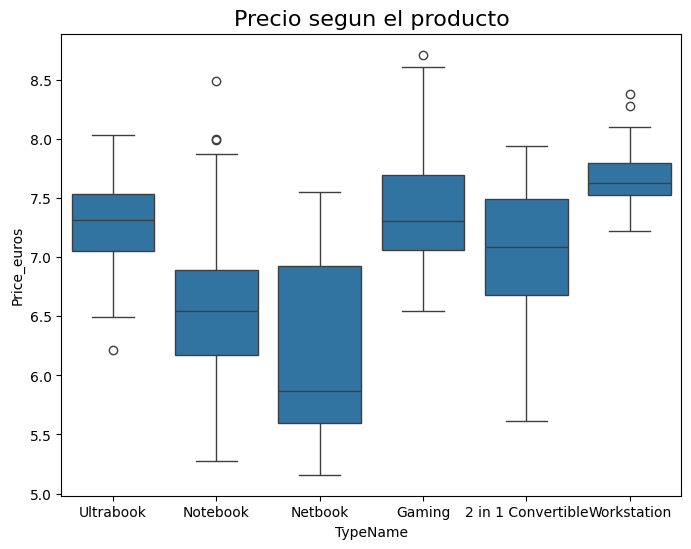

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="TypeName", y="Price_euros", data=df)
plt.title(
    "Precio segun el producto",
    fontsize=16,
)
plt.xlabel("TypeName")
plt.ylabel("Price_euros")
plt.show()

<Axes: xlabel='Ram', ylabel='Price_euros'>

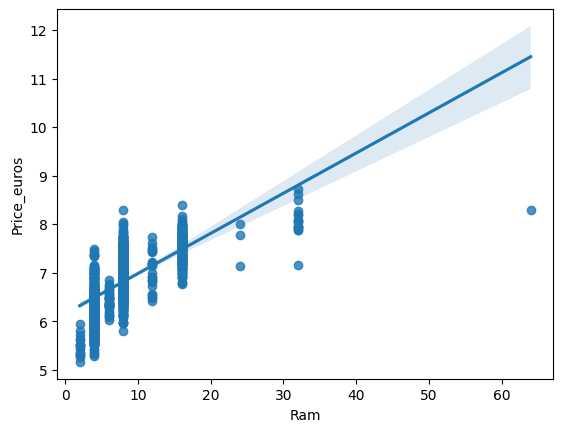

In [ ]:
sns.regplot(x='Ram', y='Price_euros', data=df)

In [ ]:
variables_numericas = df.select_dtypes(include=['int64', 'float64']).columns.to_list()
variables_numericas

['Inches',
 'Ram',
 'Weight',
 'Price_euros',
 'ScreenW',
 'ScreenH',
 'CPU_freq',
 'PrimaryStorage',
 'SecondaryStorage']

In [ ]:
variables_numericas = df.select_dtypes(include=['object']).columns.to_list()
variables_numericas

['Company',
 'Product',
 'TypeName',
 'OS',
 'Screen',
 'Touchscreen',
 'IPSpanel',
 'RetinaDisplay',
 'CPU_company',
 'CPU_model',
 'PrimaryStorageType',
 'SecondaryStorageType',
 'GPU_company',
 'GPU_model']

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
enc = OrdinalEncoder()
df_ordinal_encoder = df.copy()
df_ordinal_encoder[['Company','Product', 'TypeName', 'OS', 'Screen',
                    'Touchscreen', 'IPSpanel', 'RetinaDisplay', 'CPU_company',
                    'CPU_model', 'PrimaryStorageType', 'SecondaryStorageType',
                    'GPU_company', 'GPU_model']] = enc.fit_transform(df_ordinal_encoder[['Company','Product', 'TypeName', 'OS', 'Screen',
                                                                          'Touchscreen', 'IPSpanel', 'RetinaDisplay', 'CPU_company',
                                                                          'CPU_model', 'PrimaryStorageType', 'SecondaryStorageType',
                                                                          'GPU_company', 'GPU_model']])

df_ordinal_encoder.head(3)

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,1.0,300.0,4.0,13.3,8,8.0,1.37,7.200194,3.0,2560,...,1.0,1.0,2.3,40.0,128,0,3.0,2.0,2.0,60.0
1,1.0,301.0,4.0,13.3,8,8.0,1.34,6.801216,3.0,1440,...,0.0,1.0,1.8,40.0,128,0,0.0,2.0,2.0,53.0
2,7.0,50.0,3.0,15.6,8,4.0,1.86,6.354370,1.0,1920,...,0.0,1.0,2.5,46.0,256,0,3.0,2.0,2.0,55.0


In [ ]:
### Multicolinealidad
# Correlaciones
df_correlacion = df_ordinal_encoder.drop(columns= 'Price_euros')

# Matrix de correlacion
matriz_correlacion = df_correlacion.select_dtypes(include=['int64','float64']).corr(method='pearson')
df_correlacion = matriz_correlacion.stack().reset_index()
df_correlacion.columns =  ['variable_1','variable_2','correlacion']
df_correlacion = df_correlacion.loc[df_correlacion['variable_1']!= df_correlacion['variable_2'],:]

df_correlacion['correlacion_valor_absoluto'] = np.abs(df_correlacion['correlacion'])
df_correlacion_alta = df_correlacion[df_correlacion['correlacion_valor_absoluto']>=0.75]
df_correlacion_alta

,variable_1,variable_2,correlacion,correlacion_valor_absoluto
72,Inches,Weight,0.826638,0.826638
135,Weight,Inches,0.826638,0.826638
185,ScreenW,ScreenH,0.994069,0.994069
206,ScreenH,ScreenW,0.994069,0.994069
393,SecondaryStorage,SecondaryStorageType,-0.956550,0.956550
435,SecondaryStorageType,SecondaryStorage,-0.956550,0.956550


In [ ]:
from sklearn.model_selection import  train_test_split

In [ ]:
x = df_ordinal_encoder.drop(columns='Price_euros') # Todas las varibales menos la variable objetivo
y = df_ordinal_encoder['Price_euros'] # solo la variable objetivo

x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x,
                                                    y.values.reshape(-1,1),
                                                    train_size = 0.8,
                                                    random_state = 23102024,
                                                    shuffle = True)


In [ ]:
# Creacion del modelo
import statsmodels.api as sm
x_train_1 = sm.add_constant(x_train_1, prepend=True)
modelo = sm.OLS(endog = y_train_1,
                exog = x_train_1)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     160.0
Date:                Wed, 13 Nov 2024   Prob (F-statistic):          2.03e-308
Time:                        12:30:19   Log-Likelihood:                -189.28
No. Observations:                1020   AIC:                             424.6
Df Residuals:                     997   BIC:                             537.9
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.9388 

In [ ]:
# supuestos linealidad
# Test Ramsey
import statsmodels.stats.diagnostic as smd
test_ramsey = smd.linear_reset(modelo, power=2)

# Buscamos un p valor mayor al 0.05 para decir que el modelo es lineal
print('p valor:',test_ramsey.pvalue)

p valor: 7.99899212861427e-12


In [ ]:
# Supuesto independencia de los errores
from statsmodels.stats.stattools import durbin_watson
dw = durbin_watson(modelo.resid)
# se busca un valor entre 1.5 y 2.5 pára que pase el supuesto
print('valor durbin watson:',dw)

valor durbin watson: 2.066007917014093


In [ ]:
# supuesto de homocedasticidad
breush_pagan = sm.stats.diagnostic.het_breuschpagan(modelo.resid, x_train)
# se busca un p valor menor o igual al 0.05 para que pase el supuesto
breush_pagan[1] # p valor
#p_valor = round(breush_pagan[1],5)
#p_valor

3.7631605221383635e-09

In [ ]:
x_test_1.head(1)

,Company,Product,TypeName,Inches,Ram,OS,Weight,Screen,ScreenW,ScreenH,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
952,16.0,345.0,3.0,13.3,8,7.0,1.2,1.0,1920,1080,...,0.0,1.0,2.3,41.0,256,0,3.0,2.0,2.0,49.0


In [ ]:
# Predicciones
x_test = sm.add_constant(x_test_1, prepend= True)
predicciones_mod_1 = modelo.get_prediction(exog = x_test).summary_frame(alpha = 0.05)
predicciones_mod_1
predicciones_mod_1['mean'] = round(predicciones_mod_1['mean'],1)
predicciones_mod_1['mean']

,mean
952,7.1
590,6.6
217,6.9
553,6.2
1076,6.5
...,...
456,6.9
416,6.5
797,6.8
1199,7.4


In [ ]:
from sklearn.metrics import mean_squared_error
error_modelo = mean_squared_error(y_true = y_test_1,
                                  y_pred = predicciones_mod_1['mean'],
                                  squared= False )

print('error del modelo:', round(error_modelo,1))

error del modelo: 0.3


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### Segundo modelo

In [ ]:
x = df_ordinal_encoder.drop(columns=['Product', 'TypeName', 'Inches', 'Ram', 'OS', 'Screen', 'Touchscreen', 'RetinaDisplay', 'CPU_company', 'CPU_freq', 'CPU_model', 'PrimaryStorageType', 'GPU_company' ]) # Todas las varibales menos la variable objetivo
y = df_ordinal_encoder['Price_euros'] # solo la variable objetivo

x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x,
                                                    y.values.reshape(-1,1),
                                                    train_size = 0.8,
                                                    random_state = 23102024,
                                                    shuffle = True)

In [ ]:
# Creacion del modelo
import statsmodels.api as sm
x_train_2 = sm.add_constant(x_train_2, prepend=True)
modelo = sm.OLS(endog = y_train_2,
                exog = x_train_2)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.711e+27
Date:                Wed, 13 Nov 2024   Prob (F-statistic):               0.00
Time:                        12:32:14   Log-Likelihood:                 29282.
No. Observations:                1020   AIC:                        -5.854e+04
Df Residuals:                    1009   BIC:                        -5.849e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 4.374e-14 

In [ ]:
# supuestos linealidad
# Test Ramsey
import statsmodels.stats.diagnostic as smd
test_ramsey = smd.linear_reset(modelo, power=2)

# Buscamos un p valor mayor al 0.05 para decir que el modelo es lineal
print('p valor:',test_ramsey.pvalue)

p valor: 0.7926138112441049


In [ ]:
# Supuesto independencia de los errores
from statsmodels.stats.stattools import durbin_watson
dw = durbin_watson(modelo.resid)
# se busca un valor entre 1.5 y 2.5 pára que pase el supuesto
print('valor durbin watson:',dw)

valor durbin watson: 0.752739791228842


In [ ]:
# supuesto de homocedasticidad
breush_pagan = sm.stats.diagnostic.het_breuschpagan(modelo.resid, x_train_2)
# se busca un p valor menor o igual al 0.05 para que pase el supuesto
breush_pagan[1] # p valor
#p_valor = round(breush_pagan[1],5)
#p_valor

2.998356021814029e-174

In [ ]:
# Predicciones
x_test_2 = sm.add_constant(x_test_2, prepend= True)
predicciones_mod_1 = modelo.get_prediction(exog = x_test_2).summary_frame(alpha = 0.05)
predicciones_mod_1
predicciones_mod_1['mean'] = round(predicciones_mod_1['mean'],1)
predicciones_mod_1['mean']

,mean
952,7.3
590,6.6
217,6.9
553,6.3
1076,6.9
...,...
456,7.6
416,6.5
797,6.7
1199,7.6


### CONCLUSIÓN REGRESIÓN LINEAL

En los 2 modelos anteriores podemos determinar, en base a los resultados arrojados en los supuestos para que la regresión lineal funcione, que no se permite una precisión adecuada y por lo tanto, las predicciones son poco fiables en los modelos.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RandomizedSearchCV
import multiprocessing
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(
                                  df_ordinal_encoder.drop(columns=['Price_euros']),
                                  df_ordinal_encoder['Price_euros'],
                                  train_size = 0.75,
                                  random_state = 6112204,
                                  shuffle= True)# mesclar datos

In [ ]:
parametros = {'hidden_layer_sizes': [(10), (10,10), (8, 8)],
              'alpha': np.logspace(-3,3,3),
              'learning_rate_init': [0.001, 0.1]}

In [ ]:
modelo_regresion = RandomizedSearchCV(
    estimator = MLPRegressor(solver = 'lbfgs', max_iter=1000),
    param_distributions = parametros,
    n_iter= 50,
    scoring = 'neg_mean_squared_error',
    n_jobs = multiprocessing.cpu_count()-1,
    cv = 3,
    verbose = 0,
    random_state = 61212024,
    return_train_score = True,
    error_score='raise'
)

modelo_regresion.fit(X = x_train_3, y = y_train_3)
resultados = pd.DataFrame(modelo_regresion.cv_results_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 18 is smaller than n_iter=50. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _c

In [ ]:
resultados.head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate_init,param_hidden_layer_sizes,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.407007,0.190802,0.003206,0.000334,0.001,10,0.001,"{'learning_rate_init': 0.001, 'hidden_layer_si...",-0.503388,-0.257064,-0.351065,-0.370505,0.101497,11,-0.488542,-0.226149,-0.202241,-0.305644,0.129696
1,0.389336,0.234029,0.003235,0.000400,0.100,10,0.001,"{'learning_rate_init': 0.1, 'hidden_layer_size...",-0.287856,-0.196143,-0.276804,-0.253601,0.040879,7,-0.184205,-0.181182,-0.253148,-0.206179,0.033236


###CONCLUSIONES

In [ ]:
mejor_modelo = modelo_regresion.best_estimator_
mejor_modelo

MLPRegressor(alpha=1.0, hidden_layer_sizes=10, learning_rate_init=0.1,
             max_iter=1000, solver='lbfgs')

In [ ]:
# Predicciones
y_pred = mejor_modelo.predict(x_test_3)

mse = mean_squared_error(y_test_3, y_pred)
print(f'Error cuadrático medio (MSE): {mse}')

Error cuadrático medio (MSE): 0.22854112704730606


In [ ]:
r2 = r2_score(y_test_3, y_pred)
print(f'R-cuadrado (R2): {r2}')

R-cuadrado (R2): 0.39915576714709566


CONCLUSIÓN REGRESIÓN NEURONAL

El modelo de regresión neuronal aún no predice el precio de los laptops con la precisión deseada, pero este modelo con un R² de 0.399, nos muestra que faltan algunos ajustes para mejorar su capacidad de predicción y obtener resultados más precisos.